In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

            Time_s  Sensor0_Raw  Sensor1_Raw  DutyCycle
1989  1.736097e+09       1.1387       1.5065       80.0
3712  1.736097e+09       1.1032       1.2516      185.0
3985  1.736097e+09       1.0839       1.2032      202.0
2309  1.736097e+09       1.1290       1.4581      100.0
3435  1.736097e+09       1.1064       1.3516      168.0


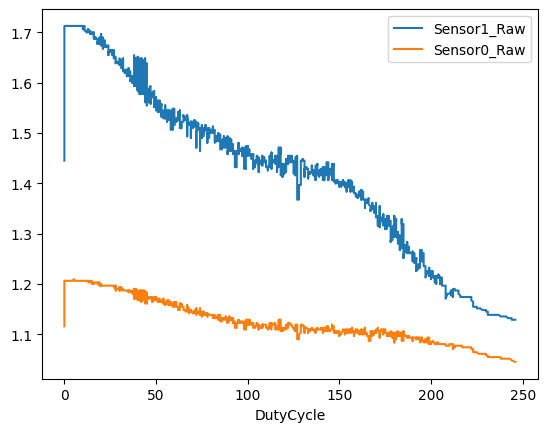

In [38]:
df = pd.read_csv('calibration_data.csv')
print(df.sample(5))

df[['DutyCycle', 'Sensor1_Raw', 'Sensor0_Raw']].plot(x="DutyCycle")
plt.show()

In [39]:
X = np.array(df[['DutyCycle', 'Sensor1_Raw']])
y = np.array(df['Sensor0_Raw']) # magnet and permanent magnet

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9960648446805013

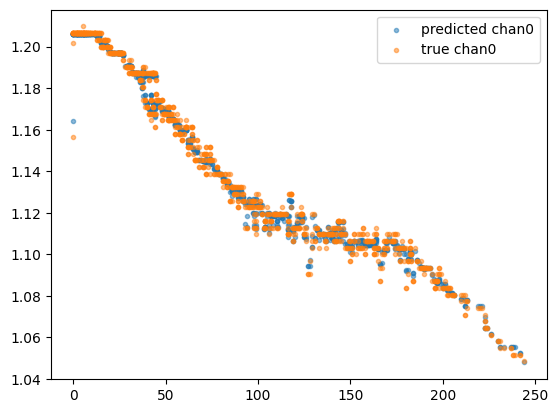

In [40]:
plt.scatter(X_test[:,0], model.predict(X_test), label='predicted chan0', marker='.', alpha=0.5)
plt.scatter(X_test[:,0], y_test, label='true chan0', marker='.',alpha=0.5)
plt.legend()

In [41]:
pred = model.predict(np.array([0,1.6]).reshape(1,-1))[0]

pred

1.1806802580387357

In [42]:
2.4 - pred

1.2193197419612642